#Kết nối google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Nhận diện khuôn mặt

##Thư viện

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

## Model nhận diện khuôn mặt

In [ ]:
face_cascade = cv2.CascadeClassifier(r'/content/drive/MyDrive/[CS231] Đồ án cuối kỳ/Notebook/Source code tổng/Model/haarcascade_frontalface_default.xml')

##Có khẩu trang

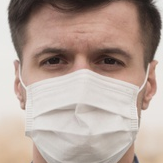

In [ ]:
img_mask = cv2.imread(r'/content/drive/MyDrive/[CS231] Đồ án cuối kỳ/Data/New Masks Dataset/Test/Mask/2086.jpg')
img_mask_gray = cv2.cvtColor(img_mask, cv2.COLOR_BGR2GRAY)

face_mask = face_cascade.detectMultiScale(img_mask_gray, scaleFactor=1.1, minNeighbors=4)
for (x, y, w, h) in face_mask:
    face_mask_img = img_mask[y:y + h, x:x + w]
    
cv2_imshow(face_mask_img)

## Không khẩu trang

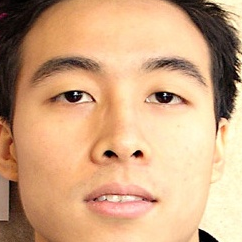

In [ ]:
img_no_mask = cv2.imread(r'/content/drive/MyDrive/[CS231] Đồ án cuối kỳ/Data/New Masks Dataset/Train/Non Mask/15.jpg')
img_no_mask_gray = cv2.cvtColor(img_no_mask, cv2.COLOR_BGR2GRAY)

face_no_mask = face_cascade.detectMultiScale(img_no_mask_gray, scaleFactor=1.1, minNeighbors=4)
for (x, y, w, h) in face_no_mask:
    face_no_mask_img = img_no_mask[y:y + h, x:x + w]
    
cv2_imshow(face_no_mask_img)

#Tạo Model

## Thư viện

In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy


## Model

### Tạo model

In [ ]:
#tao ra mot model
model=Sequential()

#tạo layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3))) #lấy feature từ ảnh
model.add(MaxPooling2D()) #giảm thông số khi train, nhưng vẫn giữ được đặc trưng của ảnh

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )

#Lam phang
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

#Hoan thanh model voi ham loss ca ham optimizer
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])

### Tiền xử lý và đưa dữ liệu vào

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
Validation_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/[CS231] Đồ án cuối kỳ/Data/New Masks Dataset/Train',
                                                 target_size=(150,150),
                                                 batch_size=16 ,
                                                 class_mode='binary')
Validation_set = Validation_datagen.flow_from_directory(r'/content/drive/MyDrive/[CS231] Đồ án cuối kỳ/Data/New Masks Dataset/Validation',
                                            target_size=(150,150),
                                            batch_size=16,
                                            class_mode='binary')

Found 1399 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


###Train model

In [ ]:
# model_saved = model.fit_generator(training_set,
#                                   epochs=10,
#                                   validation_data=Validation_set)
# model.save(r'/content/drive/MyDrive/[CS231] Đồ án cuối kỳ/Notebook/Source code tổng/Model/model_face_mask_4.h5',model_saved)

# Vẽ đồ thị

In [ ]:
# print(model_saved.history.keys())

In [ ]:
# plt.plot(model_saved.history['binary_accuracy'])
# plt.plot(model_saved.history['val_binary_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.savefig(r'/content/drive/MyDrive/[CS231] Đồ án cuối kỳ/Result/Biểu đồ/img_accuracy.jpg', format = 'jpg')
# plt.show()

# plt.plot(model_saved.history['loss'])
# plt.plot(model_saved.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.savefig(r'/content/drive/MyDrive/[CS231] Đồ án cuối kỳ/Result/Biểu đồ/img_loss.jpg',  format = 'jpg')
# plt.show()

# Chạy Model 

##Thư viện

In [ ]:
from keras.models import Sequential,load_model
from keras.preprocessing import image
from math import floor
import numpy as np

##Load model

In [ ]:
model = load_model(r'/content/drive/MyDrive/[CS231] Đồ án cuối kỳ/Notebook/Source code tổng/Model/model_face_mask_4.h5')

## Có khẩu trang

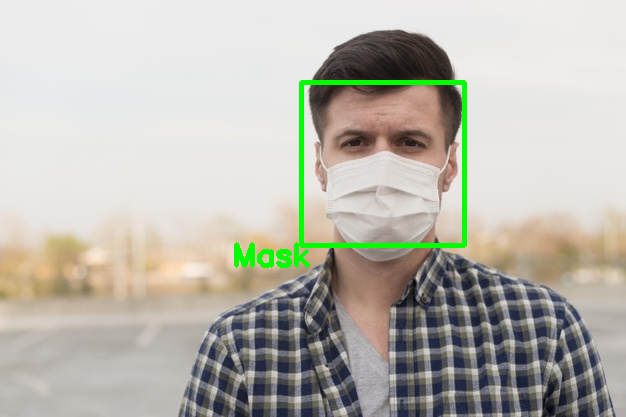

In [ ]:
cv2.imwrite('image_mask.jpg', face_mask_img)
test_image = image.load_img('image_mask.jpg', target_size=(150, 150, 3))
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0)
pred = model.predict(test_image)[0]

if pred == 1:
  cv2.rectangle(img_mask, (x, y), (x + w, y + h), (0, 0, 255), 3) #tạo text box
  cv2.putText(img_mask, 'No Mask', ((x + w) // 2, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
else:
  cv2.rectangle(img_mask, (x, y), (x + w, y + h), (0, 255, 0), 3)
  cv2.putText(img_mask, 'Mask', ((x + w) // 2, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
  
cv2_imshow(img_mask)

## Không khẩu trang

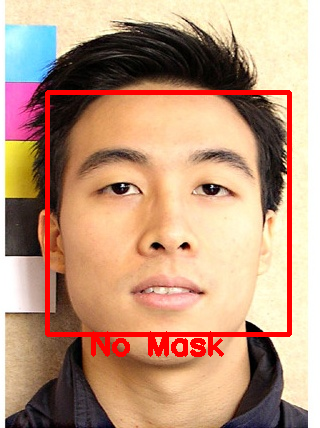

In [ ]:
cv2.imwrite('image_no_mask.jpg', face_no_mask_img)
test_image = image.load_img('image_no_mask.jpg', target_size=(150, 150, 3))
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0)
pred = model.predict(test_image)[0]

if pred == 1:
  cv2.rectangle(img_no_mask, (x, y), (x + w, y + h), (0, 0, 255), 3) #tạo text box
  cv2.putText(img_no_mask, 'No Mask',((x + w - 110) // 2, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
else:
  cv2.rectangle(img_no_mask, (x, y), (x + w, y + h), (0, 255, 0), 3)
  cv2.putText(img_no_mask, 'Mask', ((x + w) // 2, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
  
cv2_imshow(img_no_mask)

##Trường hợp đặc biệt

### Khẩu trang hình mặt người

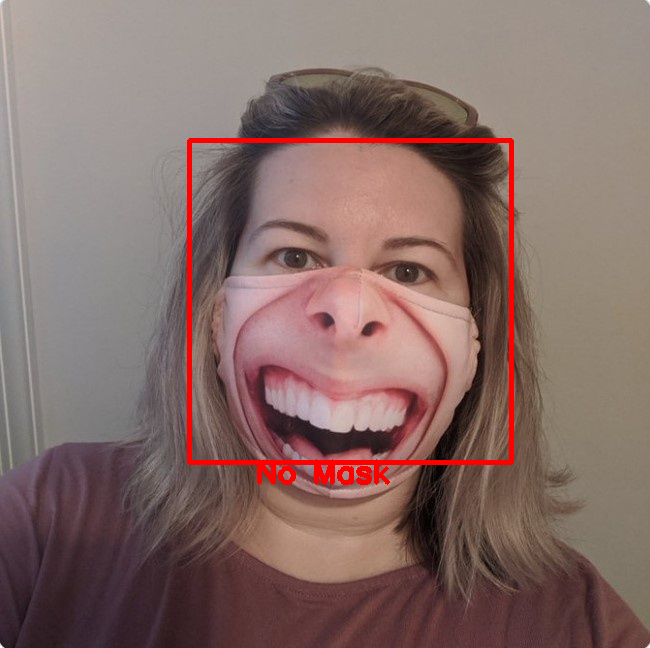

In [ ]:
img = cv2.imread(r'/content/drive/MyDrive/[CS231] Đồ án cuối kỳ/Data/Data/Test_accuracy/especially/dan-mang-the-gioi-ro-mot-in-hinh-mat-minh-len-khau-trang-23c-5122811.jpg')
#img = cv2.imread("")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
face = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=4)
for (x, y, w, h) in face:
    face_img = img[y:y + h, x:x + w]

    cv2.imwrite('image.jpg', face_img)
    test_image = image.load_img('image.jpg', target_size=(150, 150, 3))
    test_image = image.img_to_array(test_image)

    test_image = np.expand_dims(test_image, axis=0)
    pred = model.predict(test_image)[0]

    if pred == 1:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 3) #tạo text box
        cv2.putText(img, 'No Mask', ((x + w) // 2, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
    else:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
        cv2.putText(img, 'Mask', ((x + w) // 2, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
    
cv2_imshow(img)

### Khẩu trang dành cho người khiếm thính

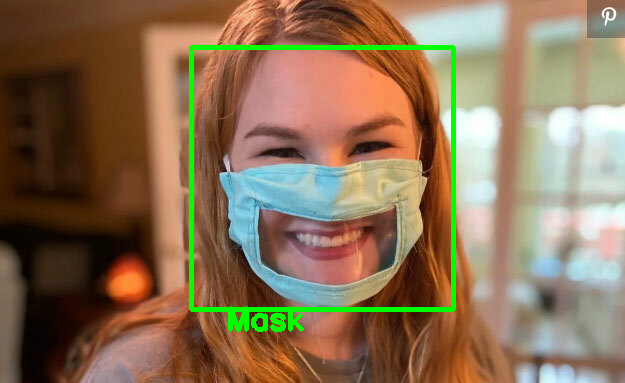

In [ ]:
img = cv2.imread(r'/content/drive/MyDrive/[CS231] Đồ án cuối kỳ/Data/Data/Test_accuracy/especially/khau-trang-5605-1585908425.jpg')
#img = cv2.imread('')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
face = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=4)
for (x, y, w, h) in face:
    face_img = img[y:y + h, x:x + w]

    cv2.imwrite('image.jpg', face_img)
    test_image = image.load_img('image.jpg', target_size=(150, 150, 3))
    test_image = image.img_to_array(test_image)

    test_image = np.expand_dims(test_image, axis=0)
    pred = model.predict(test_image)[0]

    if pred == 1:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 3) #tạo text box
        cv2.putText(img, 'No Mask', ((x + w) // 2, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
    else:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
        cv2.putText(img, 'Mask', ((x + w) // 2, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
    
cv2_imshow(img)

###Đeo sai cách


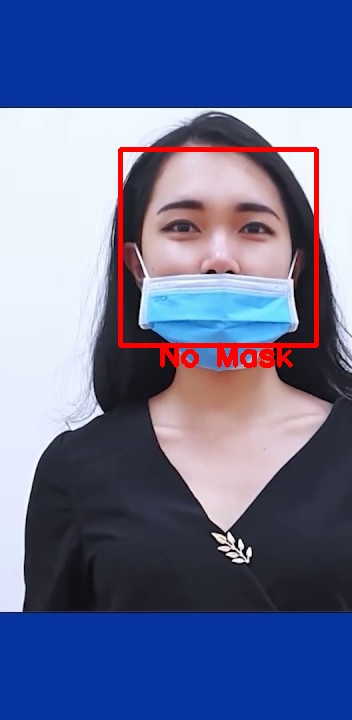

In [ ]:
img = cv2.imread(r'/content/drive/MyDrive/[CS231] Đồ án cuối kỳ/Data/Data/Test_accuracy/especially/maxresdefault.jpg')
#img = cv2.imread('')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
face = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=4)
for (x, y, w, h) in face:
    face_img = img[y:y + h, x:x + w]

    cv2.imwrite('image.jpg', face_img)
    test_image = image.load_img('image.jpg', target_size=(150, 150, 3))
    test_image = image.img_to_array(test_image)

    test_image = np.expand_dims(test_image, axis=0)
    pred = model.predict(test_image)[0]

    if pred == 1:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 3) #tạo text box
        cv2.putText(img, 'No Mask', ((x + w) // 2, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
    else:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
        cv2.putText(img, 'Mask', ((x + w) // 2, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
    
cv2_imshow(img)

## Ảnh nhiều người

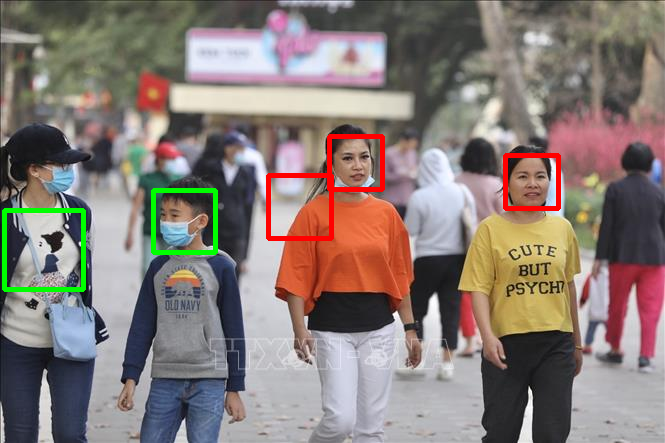

In [ ]:
#img = cv2.imread(r'/content/drive/MyDrive/[CS231] Đồ án cuối kỳ/Data/Data/')
img = cv2.imread(r'/content/vna_potal_ha_noi_nguoi_dan_van_chu_quan_khong_deo_khau_trang_noi_cong_cong_stand.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
face = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=4)
for (x, y, w, h) in face:
    face_img = img[y:y + h, x:x + w]

    cv2.imwrite('image.jpg', face_img)
    test_image = image.load_img('image.jpg', target_size=(150, 150, 3))
    test_image = image.img_to_array(test_image)

    test_image = np.expand_dims(test_image, axis=0)
    pred = model.predict(test_image)[0]

    if pred == 1:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 3) #tạo text box
        #cv2.putText(img, 'No Mask', ((x + w) // 2, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
    else:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
        #cv2.putText(img, 'Mask', ((x + w) // 2, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
  
cv2_imshow(img)

#Kết quả

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/[CS231] Đồ án cuối kỳ/Data/New Masks Dataset/Test',
                                            target_size=(150,150),
                                            batch_size=16,
                                            class_mode='binary')

Found 100 images belonging to 2 classes.


In [ ]:
history = model.evaluate_generator(test_set)
print('Test loss:', history[0])
print('Test accuracy:', history[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test loss: 0.26294034719467163
Test accuracy: 0.8600000143051147
